In [24]:
import seaborn as sns
import pandas as pd

from matplotlib import pyplot as plt

data = pd.read_csv('perf.csv')

In [21]:
data.columns

Index(['Unnamed: 0', 'impl', 'context_length', 'time_taken_ms',
       'memory_used_mb'],
      dtype='object')

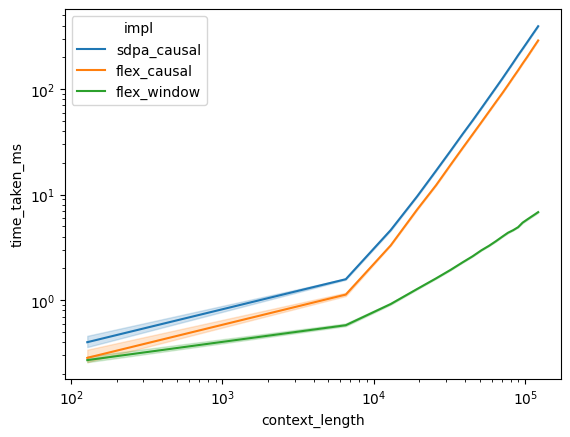

In [26]:
sns.lineplot(data, x='context_length', y='time_taken_ms', hue='impl')
plt.yscale('log')
plt.xscale('log')

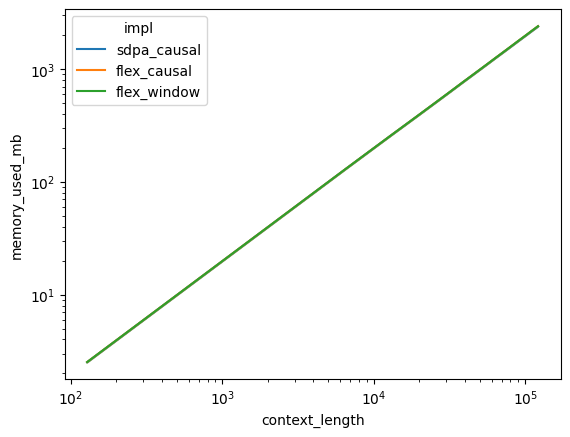

In [27]:
sns.lineplot(data, x='context_length', y='memory_used_mb', hue='impl')
plt.yscale('log')
plt.xscale('log')